<img class="gb_ua" src="https://www.gstatic.com/android/market_images/web/play_prism_hlock_2x.png" alt="" aria-hidden="true" style="width:549px;height:117px" data-atf="true">

<p style="background-color:White;">The Android World is full of apps---must haves, and fun ones.</p>

<p style="background-color:White;">When we dived into this awesome scrapped data-- we had a lot to learn.</p>


<h1 style="text-align:center;font-size:100%;;">The Libraries</h1>

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 9,7

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

<h1 style="text-align:center;font-size:100%;;">Glimpse of the data</h1>

In [94]:
apps = pd.read_csv("./googleplaystore.csv", dtype={'Rating': np.float32})
apps.head(2)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


<h1 style="text-align:center;font-size:100%;;">Unique items in each categorical variable</h1>


In [95]:
apps[['App','Category','Type','Content Rating','Genres']].nunique()

App               9660
Category            34
Type                 3
Content Rating       6
Genres             120
dtype: int64

<h1 style="text-align:center;font-size:100%;;">The type column</h1>

<p style="background-color:White;"> Interesting, Type column has 3 unique categories.<i> However, we were expecting just two- Free and Paid. </i></p>


In [96]:
apps['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

**<font color='Red'> Finding: </font>**

There is a third category- 0 among the Paid and Free apps! 



In [97]:
apps[apps['Type']== '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**<font color='Red'> Finding: </font>**

oops! Appears that the values of the columns just got shifted one place right. Lets fix it.

In [98]:
apps.loc[10472,"App"] = "Life Made WI-Fi"
apps.loc[10472,"Category"] = "Touchscreen Photo Frame"
apps.loc[10472,"Rating"] = "1.9"
apps.loc[10472,"Reviews"] = 19
apps.loc[10472,"Size"] = "3.0M"
apps.loc[10472,"Installs"] = "1,000+"
apps.loc[10472,"Type"] = "Free"
apps.loc[10472,"Price"] = "0"
apps.loc[10472,"Content Rating"] = "Everyone"
apps.loc[10472,"Genres"] = "NaN"
apps.loc[10472,"Last Updated"] = "February 11,2018"
apps.loc[10472,"Current Ver"] = "1.0.19"
apps.loc[10472,"Android Ver"] = "4.0 and up"
apps[apps['App'] == "Life Made WI-Fi"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi,Touchscreen Photo Frame,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11,2018",1.0.19,4.0 and up


<h1 style="text-align:Center;font-size:100%;;">Apps appearing more than once</h1>

Now that we are done fixing it,  Lets check whether we have any duplicate rows.

In [99]:
apps_name = apps[['App']]#extracting in pandas dataframe not as series

duplicateapps = apps_name[apps_name.duplicated()]

print(duplicateapps['App'].nunique(), 'rows of duplication')



798 rows of duplication


**<font color='Red'> Finding: </font>**


There appears to be 798 duplicate rows consisting of apps scrapped more than once! Lets have a close look after extracting the list of the same.We need to check whether they are different apps with the exact same name or it is truly a case of an app appearing more than once.We will check for one app and will generalise the same for all other duplicate ones. Let's get hold of the first one.

In [100]:
duplicateapps['App'].unique()[0]

'Quick PDF Scanner + OCR FREE'

In [101]:
apps[apps["App"]=="Quick PDF Scanner + OCR FREE"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up


**<font color='Red'> Finding: </font>**

The same app appears more than once in the data.We will get rid of those duplicate instances in out next code.

<h1 style="text-align:Center;font-size:100%;;">Retaining unique instance of each app</h1>


In [102]:
# making a bool series of all duplicates
bool_series = apps["App"].duplicated() 

#subset the unique ones
unique_apps = apps[~bool_series]

#Juct check for one app---
print(unique_apps[unique_apps["App"]=="Quick PDF Scanner + OCR FREE"])


print("The number of unique apps --- ", unique_apps['App'].nunique())



                              App  Category Rating Reviews  \
222  Quick PDF Scanner + OCR FREE  BUSINESS    4.2   80805   

                   Size    Installs  Type Price Content Rating    Genres  \
222  Varies with device  5,000,000+  Free     0       Everyone  Business   

          Last Updated         Current Ver   Android Ver  
222  February 26, 2018  Varies with device  4.0.3 and up  
The number of unique apps ---  9660


<h1 style="text-align:Center;font-size:100%;;">Formatting the data</h1>

So we have detected and retained only one instance of each app in the data.We are left with 9660 unique apps. Now we are in a position to format the data for further analysis.



We noticed that there are some float columns which have textual contents. So we require to treat the data in a format conducive to graphical representation/ model building.

# Size

In [103]:
unique_apps['Size'].value_counts()

Varies with device    1227
11M                    182
12M                    181
13M                    177
14M                    177
                      ... 
45k                      1
306k                     1
874k                     1
25k                      1
169k                     1
Name: Size, Length: 461, dtype: int64

The apps are of various sizes, some are in Kb while some are in Mb while some varies with device.
Lets fill up the missing sizes of the app using the median size of same Category

In [104]:


def conversion(dfcol):
    if 'M' in str(dfcol):
        return float(str(dfcol).replace('M', '')) * 1000000
    elif 'k' in str(dfcol):
        return float(str(dfcol).replace('k', '')) * 1000
    elif 'Varies with device' in dfcol:
        return np.nan
    else:
        return dfcol
    
unique_apps['Size'] = unique_apps['Size'].apply(conversion)
unique_apps['Size'] = unique_apps['Size'].astype(float)


unique_apps['Size']= unique_apps['Size'].fillna(unique_apps.groupby('Category')['Size'].transform('mean'))

# Installs

In [105]:
unique_apps['Installs'].value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             889
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [106]:
unique_apps['Installs'] = unique_apps['Installs'].str.replace('+','')
unique_apps['Installs'] = unique_apps['Installs'].str.replace(',','')
unique_apps['Installs']= unique_apps['Installs'].astype(float)


# Price

In [107]:
unique_apps['Price'].value_counts()

0          8904
$0.99       145
$2.99       124
$1.99        73
$4.99        70
           ... 
$154.99       1
$2.95         1
$19.90        1
$1.75         1
$400.00       1
Name: Price, Length: 92, dtype: int64

In [108]:
unique_apps['Price'] = unique_apps['Price'].str.replace('$','')

unique_apps['Price'] = unique_apps['Price'].astype(float)

In [109]:
unique_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
App               9660 non-null object
Category          9660 non-null object
Rating            8197 non-null object
Reviews           9660 non-null object
Size              9660 non-null float64
Installs          9660 non-null float64
Type              9659 non-null object
Price             9660 non-null float64
Content Rating    9660 non-null object
Genres            9660 non-null object
Last Updated      9660 non-null object
Current Ver       9652 non-null object
Android Ver       9658 non-null object
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


# Rating
<h1 style="text-align:Center;font-size:100%;;">Handling the missing values of Rating</h1>


Note that there are many instances missing for 'Rating' Variable. Going forward, we will be predicting the rating, hence we require to check this in further detail.

Also there are two cases where the current version and the Android Versioin is missing.
Let us delete the rows as, there are just two instances for the same.

In [110]:
unique_apps['Rating'] = unique_apps['Rating'].astype(float)
unique_apps.dropna(axis = 0, subset = ['Rating','Current Ver', 'Android Ver'], inplace = True)
unique_apps['Reviews'] = unique_apps['Reviews'].astype(float)
unique_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8191 entries, 0 to 10840
Data columns (total 13 columns):
App               8191 non-null object
Category          8191 non-null object
Rating            8191 non-null float64
Reviews           8191 non-null float64
Size              8191 non-null float64
Installs          8191 non-null float64
Type              8191 non-null object
Price             8191 non-null float64
Content Rating    8191 non-null object
Genres            8191 non-null object
Last Updated      8191 non-null object
Current Ver       8191 non-null object
Android Ver       8191 non-null object
dtypes: float64(5), object(8)
memory usage: 895.9+ KB


<h1 style="text-align:Center;font-size:100%;;">Number of Missing Values</h1>
A check on Missing values

In [111]:
total_missing = unique_apps.isnull().sum().sort_values()
print(total_missing)
print(unique_apps.shape , "---- Final shape of the Data")


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64
(8191, 13) ---- Final shape of the Data


This is our final cleaned data, with 8197 rows and 11 columns, where we will apply various visualizations to understand the pattern and then apply ML algorithms to predict ratings.

<h1 style="text-align:Center;font-size:100%;;">Copy of the data in right format</h1>

In [112]:
df = unique_apps.copy()

# Analysis on cleaned data
<h1 style="text-align:center;font-size:100%;;">Most Downloaded Categories</h1>


In [113]:
print("There are" , len(df['Category'].value_counts()), "Different Categories.")


There are 34 Different Categories.


Merge the categories which has less than 1% of apps, so that the result is not skewed by categories which have very few apps.

In [114]:
cat_pc = df['Category'].value_counts()/df['Category'].value_counts().sum()
type(cat_pc)
arr = []
for index in cat_pc.index:
    if cat_pc[index] < 0.01:
        arr.append(index)
df['category_clubbed'] = np.where(df["Category"].isin(arr), "OTHERS", df['Category'])
print("There are" , len(df['category_clubbed'].value_counts()), "Different Categories after merging.")

There are 25 Different Categories after merging.


In [115]:

print("\n", 'The most popular categories are as follows:')
df_top_cat = df[['category_clubbed','Installs']].groupby(['category_clubbed'], as_index = False).mean().sort_values(['Installs'], ascending = False).head(5)
df_top_cat


 The most popular categories are as follows:


,category_clubbed,Installs
2,COMMUNICATION,4.311813e+07
20,SOCIAL,2.703370e+07
24,VIDEO_PLAYERS,2.653241e+07
5,ENTERTAINMENT,2.072216e+07
18,PRODUCTIVITY,1.924608e+07


Communication, Social and Video Players are the most downloaded categories.

In [116]:
 df[['category_clubbed','Installs']].groupby(['category_clubbed'], as_index = False).mean().sort_values(['Installs'], ascending = True).head(5)


,category_clubbed,Installs
13,MEDICAL,1.315610e+05
3,DATING,1.051585e+06
7,FINANCE,1.507657e+06
15,OTHERS,1.524010e+06
11,LIFESTYLE,1.673559e+06


In [117]:
df_for_category_plot = df[['category_clubbed', 'Installs']].groupby(['category_clubbed'], as_index=False).mean().sort_values(by = 'Installs', ascending = False)

trace1 = go.Bar(
    x=df_for_category_plot['category_clubbed'],  
    y=df_for_category_plot['Installs']
   
)
data =[trace1]
layout = go.Layout(title = "Installs for each Category")
fig = go.Figure(data = data, layout = layout)
fig.show()

In [118]:
# plot for the top 10 genres in terms of installation for paid and free

Text(0.5, 1, 'Boxenplot of Rating VS Top 10 Categories')

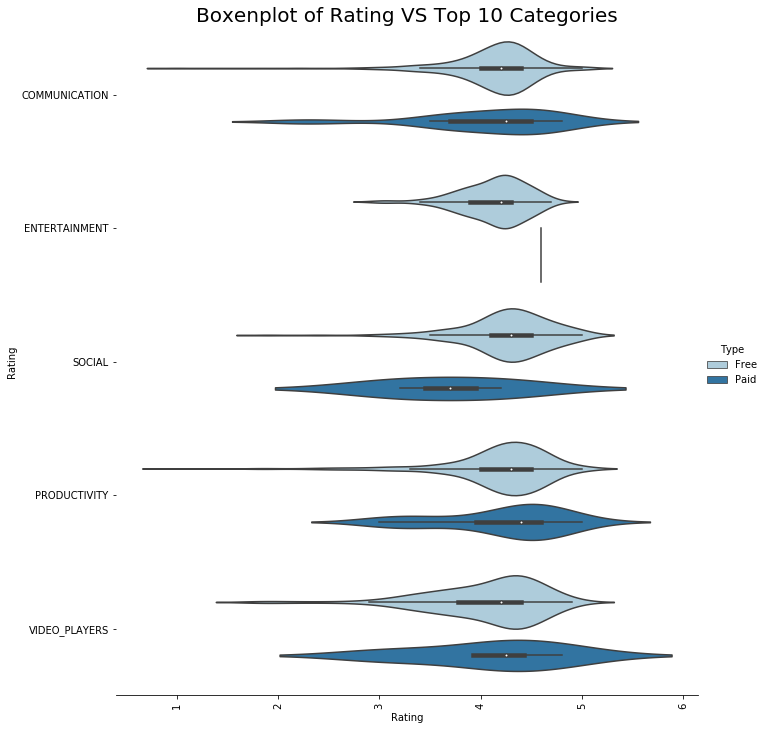

In [119]:
#list of top cats
newarray=[]
for categories in df_top_cat['category_clubbed']:
    newarray.append(categories)

data_to_plot = df.loc[df['category_clubbed'].isin(newarray), :]


g = sns.catplot(y="category_clubbed",x="Rating",data=data_to_plot, kind="violin",hue = 'Type', height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxenplot of Rating VS Top 10 Categories',size = 20)


<h1 style="text-align:center;font-size:100%;;">What are the different genres that are there?</h1>


In [120]:


print( 'There are',len(df['Genres'].unique()) , "genres \n")

df['Genres'].value_counts()





There are 115 genres 



Tools                          716
Entertainment                  471
Education                      429
Finance                        302
Productivity                   301
                              ... 
Music & Audio;Music & Video      1
Tools;Education                  1
Health & Fitness;Education       1
Art & Design;Pretend Play        1
Entertainment;Education          1
Name: Genres, Length: 115, dtype: int64

<h1 style="text-align:center;font-size:100%;;">Clubbing the Genres </h1>

Note that there are several sub-genres but many of them have just few apps classified. For simplicity and ease of visualization, let us consider just the genres for each app.










In [121]:
df['Genres'] = df['Genres'].str.split(';').str[0]
# print(df['Genres'].value_counts())
print('Now there are', df['Genres'].nunique(), 'Genres')

Now there are 49 Genres


In [122]:
genre_pc = df['Genres'].value_counts()/df['Genres'].value_counts().sum()

arr = []
for index in genre_pc.index:
    if genre_pc[index] < 0.01:
        arr.append(index)
df['genre_clubbed'] = np.where(df["Genres"].isin(arr), "Others", df['Genres'])
# df['genre_clubbed'].value_counts()
print('Now after clubbing there are', df['genre_clubbed'].nunique(), 'Genres')

Now after clubbing there are 32 Genres


<h1 style="text-align:center;font-size:100%;;">Popular genre</h1>




In [123]:

df_top_gen = df[['genre_clubbed','Installs']].groupby(['genre_clubbed'], as_index = False).mean().sort_values(['Installs'], ascending = False).head(5)

df_top_gen

,genre_clubbed,Installs
5,Communication,4.295230e+07
26,Social,2.703370e+07
31,Video Players & Editors,2.624531e+07
1,Arcade,2.054750e+07
20,Productivity,1.924608e+07


<h1 style="text-align:center;font-size:100%;;">Not so popular genre</h1>




In [378]:
df[['genre_clubbed','Installs']].groupby(['genre_clubbed'], as_index = False).mean().sort_values(['Installs'], ascending = True).head(5)

,genre_clubbed,Installs
15,Medical,1.315610e+05
7,Education,8.986281e+05
6,Dating,1.051585e+06
10,Finance,1.507657e+06
13,Lifestyle,1.668348e+06


<h1 style="text-align:center;font-size:100%;;">Poorly rated Genre</h1>

In [379]:


df[['genre_clubbed', 'Rating']].groupby(['genre_clubbed'], as_index=False).mean().sort_values('Rating').head(5)




,genre_clubbed,Rating
6,Dating,3.970149
14,Maps & Navigation,4.036441
29,Tools,4.039331
31,Video Players & Editors,4.044667
30,Travel & Local,4.069519


There are some interesting insights here. 'Dating' genre is the least installed as well the worst rated, while 'Tools' and 'Video PLayers & Editors' are the highly downloded category, however still poorly rated.

<h1 style="text-align:center;font-size:100%;;">Highly rated Genre</h1>

In [380]:

df[['genre_clubbed', 'Rating']].groupby(['genre_clubbed'], as_index=False).mean().sort_values('Rating', ascending = False).head(5)

,genre_clubbed,Rating
21,Puzzle,4.373770
2,Books & Reference,4.343275
18,Personalization,4.331419
7,Education,4.293976
1,Arcade,4.277838


In [381]:
df_for_genre_plot = df[['genre_clubbed', 'Installs']].groupby(['genre_clubbed'], as_index=False).mean().sort_values(by = 'Installs',ascending = False)

trace1 = go.Bar(
    x=df_for_genre_plot['genre_clubbed'],  
    y=df_for_genre_plot['Installs']
   
)
data =[trace1]
layout = go.Layout(title = "Installs for each Genre")
fig = go.Figure(data = data, layout = layout)
fig.show()

In [382]:
#Needs correction

Text(0.5, 1, 'Boxenplot of Rating of Top 5 Categories')

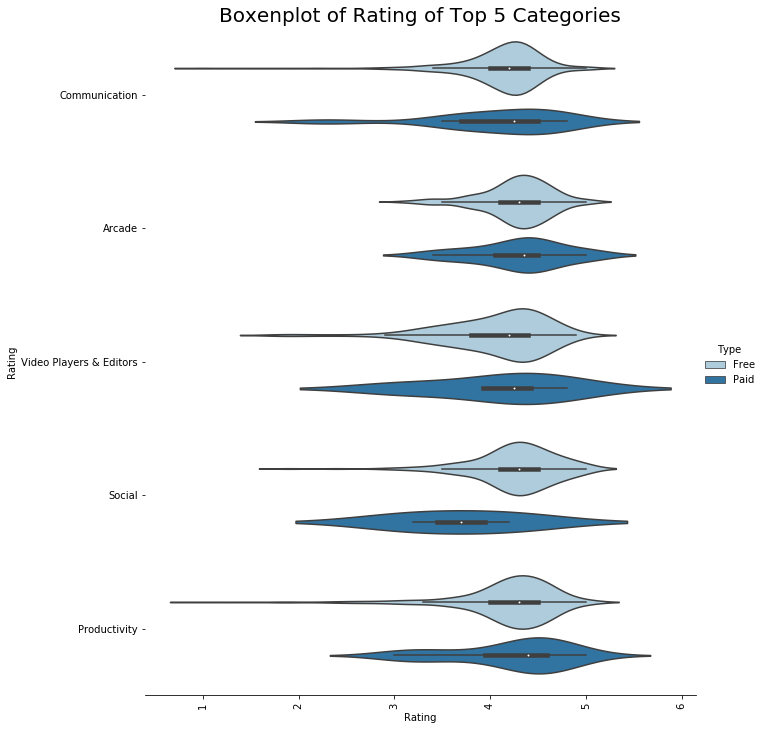

In [124]:
newarray_2=[]
for genre in df_top_gen['genre_clubbed']:
    newarray_2.append(genre)

data_to_plot = df.loc[df['genre_clubbed'].isin(newarray_2), :]


g = sns.catplot(y="genre_clubbed",x="Rating",data=data_to_plot, kind="violin",hue = 'Type', height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxenplot of Rating of Top 5 Categories',size = 20)

<h1 style="text-align:center;font-size:100%;;">Popular Content Rating </h1>

In [384]:
print(df['Content Rating'].value_counts().head(10))
print("There are" , len(df['Content Rating'].value_counts()), "types of Content Rating.")


Everyone           6613
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64
There are 6 types of Content Rating.


**<font color='Red'> Finding: </font>**

The Most popular Content Ratings are Everyone and teen, i.e most apps are released for all age groups or specifically for teens

<h1 style="text-align:center;font-size:100%;;">Rating --How is rating disributed over all Apps?</h1>



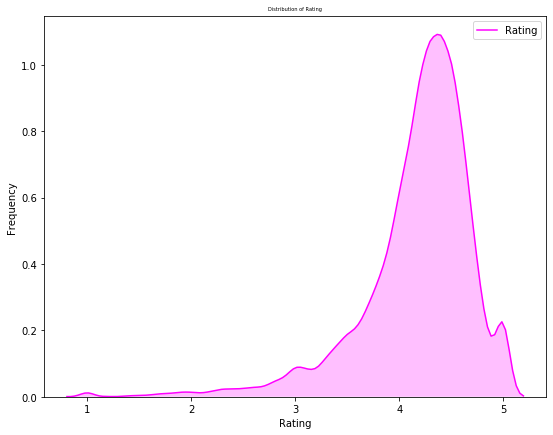

In [385]:

g = sns.kdeplot(df['Rating'], color="Magenta", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 5)
plt.show()

**<font color='Red'> Finding: </font>**


On an average, the rating for Google play Store apps is on the higher side- infact around 4.0.
Good News App Developers!

<h1 style="text-align:center;font-size:100%;;">Clubbing the Price Brackets</h1>

Now what happens if we merge a few price brackets and explore rating with the price brackets.

In [386]:
print(df.loc[(df['Price'] > 0),'Price'].describe())
print(df.loc[(df['Price'] > 4.99), 'Price'].describe())


count    602.000000
mean      14.126279
std       60.744377
min        0.990000
25%        1.990000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64
count    115.000000
mean      62.363304
std      128.621029
min        5.490000
25%        7.490000
50%       10.000000
75%       19.695000
max      400.000000
Name: Price, dtype: float64


In [387]:
df.loc[ (df['Price'] == 0), 'PriceBand'] = 'A'
df.loc[(df['Price'] > 0) & (df['Price'] <= 1.99), 'PriceBand'] = 'B'
df.loc[(df['Price'] > 1.99) & (df['Price'] <= 2.99), 'PriceBand']   = 'C'
df.loc[(df['Price'] > 2.99) & (df['Price'] <= 4.99), 'PriceBand']   = 'D'
df.loc[(df['Price'] > 4.99) & (df['Price'] <= 19.69), 'PriceBand']   = 'E'
df.loc[(df['Price'] > 19.69), 'PriceBand'] = 'F'



In [388]:
df[['PriceBand', 'Rating']].groupby(['PriceBand'], as_index=False).mean().sort_values('PriceBand', ascending = True)

,PriceBand,Rating
0,A,4.166162
1,B,4.297059
2,C,4.293333
3,D,4.237838
4,E,4.226744
5,F,4.051724


We can see that apps at the highest price bracket is the least rated.

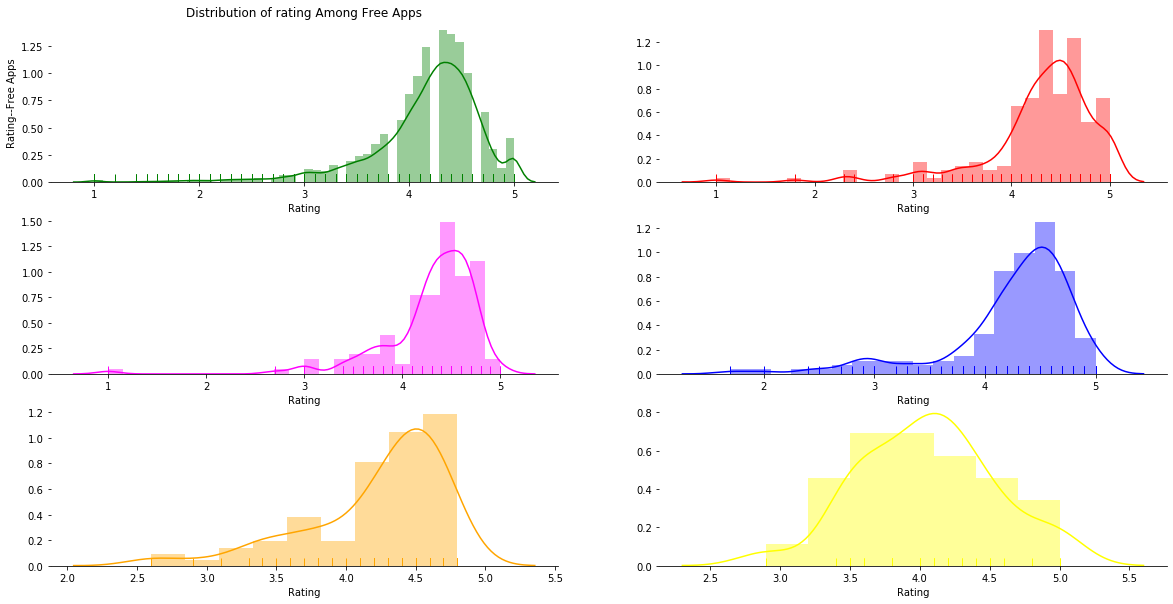

In [389]:
dist_free = df[df['PriceBand'] == 'A']
dist_B = df[df['PriceBand'] == 'B']
dist_C = df[df['PriceBand'] == 'C']
dist_D = df[df['PriceBand'] == 'D']
dist_E = df[df['PriceBand'] == 'E']
dist_F = df[df['PriceBand'] == 'F']


fig, ax = plt.subplots(3,2,figsize=(20,10))
sns.despine(left=True)

g1 = sns.distplot(dist_free['Rating'], kde=True, color="green", rug = True, ax=ax[0,0] )
g1.set_ylabel("Rating--Free Apps")
ax[0,0].set_title("Distribution of rating Among Free Apps")
sns.distplot(dist_B['Rating'], kde=True, color="red",rug = True, ax=ax[0,1]) 

sns.distplot(dist_C['Rating'], kde=True, color="magenta",rug = True, ax=ax[1,0]) 
sns.distplot(dist_D['Rating'], kde=True, color="blue", rug = True,ax=ax[1,1])
sns.distplot(dist_E['Rating'], kde=True, color="orange",rug = True, ax=ax[2,0]) 
sns.distplot(dist_F['Rating'], kde=True, color="yellow",rug = True, ax=ax[2,1])

The Free apps has the highest spread of rating, followed by not cheap and normal.As noted earlier most expensive apps are harshly rated.

Whats the most expensive App?





In [390]:
df[df['Type']=='Paid'].max()

App                              💎 I'm rich
Category                            WEATHER
Rating                                    5
Reviews                         2.37656e+06
Size                                  1e+08
Installs                              1e+07
Type                                   Paid
Price                                   400
Content Rating                         Teen
Genres                              Weather
Last Updated              September 8, 2013
Current Ver                              v3
Android Ver              Varies with device
category_clubbed              VIDEO_PLAYERS
genre_clubbed       Video Players & Editors
PriceBand                                 F
dtype: object

So the most expensive app is 'I'm rich' and its cost is 400 Dollars!

<h1 style="text-align:center;font-size:100%;;"><h1 style="text-align:center;font-size:100%;;">Do people download and install free apps more?</h1></h1>


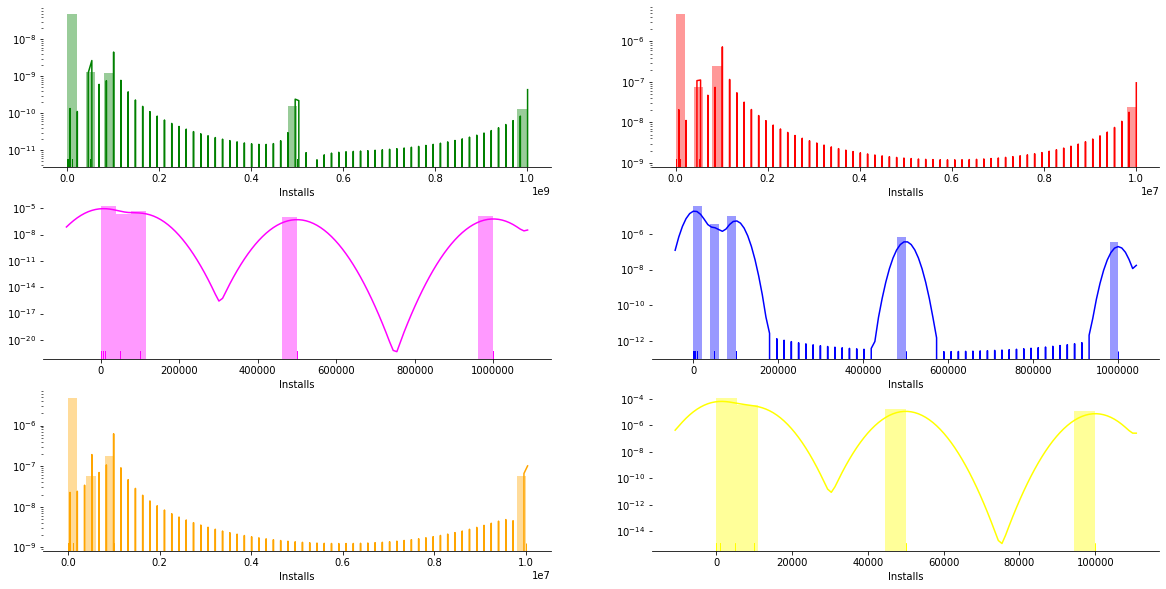

In [391]:
fig, ax = plt.subplots(3,2,figsize=(20,10))
sns.despine(left=True)
ax[0,0].set_yscale("log")
ax[0,1].set_yscale("log")
ax[1,0].set_yscale("log")
ax[1,1].set_yscale("log")
ax[2,0].set_yscale("log")
ax[2,1].set_yscale("log")
g1 = sns.distplot(dist_free['Installs'], kde=True, color="green", rug = True, ax=ax[0,0] )
sns.distplot(dist_B['Installs'], kde=True, color="red",rug = True, ax=ax[0,1]) 
sns.distplot(dist_C['Installs'], kde=True, color="magenta",rug = True, ax=ax[1,0]) 
sns.distplot(dist_D['Installs'], kde=True, color="blue", rug = True,ax=ax[1,1])
sns.distplot(dist_E['Installs'], kde=True, color="orange",rug = True, ax=ax[2,0]) 
sns.distplot(dist_F['Installs'], kde=True, color="yellow",rug = True, ax=ax[2,1])

**<font color='Red'> Finding: </font>**

Yep! people do install and use free apps more than paid apps.

<h1 style="text-align:center;font-size:100%;;">So what are the ten most popular apps?</h1>

In [392]:
df[df['Installs'] > 500000000].head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,category_clubbed,genre_clubbed,PriceBand
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,1.313470e+07,1.000000e+09,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device,BOOKS_AND_REFERENCE,Books & Reference,A
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,1.130743e+07,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,COMMUNICATION,Communication,A
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,1.130743e+07,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,COMMUNICATION,Communication,A
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,1.130743e+07,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,COMMUNICATION,Communication,A
340,Gmail,COMMUNICATION,4.3,4604324.0,1.130743e+07,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,COMMUNICATION,Communication,A
341,Hangouts,COMMUNICATION,4.0,3419249.0,1.130743e+07,1.000000e+09,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,COMMUNICATION,Communication,A
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169.0,1.130743e+07,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,COMMUNICATION,Communication,A
865,Google Play Games,ENTERTAINMENT,4.3,7165362.0,2.304375e+07,1.000000e+09,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device,ENTERTAINMENT,Entertainment,A
1654,Subway Surfers,GAME,4.5,27722264.0,7.600000e+07,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,GAME,Arcade,A
2544,Facebook,SOCIAL,4.1,78158306.0,1.598409e+07,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,SOCIAL,Social,A


**<font color='Red'> Finding: </font>**

Most downloded apps are the ones which are of basic necessity and are Free.

## Clubbing the Size brackets

In [393]:
print(df.loc[(df['Size'] > 0),'Size'].describe())



count    8.191000e+03
mean     2.128694e+07
std      2.130408e+07
min      8.500000e+03
25%      5.800000e+06
50%      1.400000e+07
75%      2.800000e+07
max      1.000000e+08
Name: Size, dtype: float64


Now we try to find which of the numerical characteristics are correlated with each other. Our best friend is the correlation matrix.

In [394]:
df[['Rating','Reviews','Size','Installs','Price']].corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.055082,0.059366,0.040168,-0.021160
Reviews,0.055082,1.000000,0.072580,0.624051,-0.007790
Size,0.059366,0.072580,1.000000,0.034499,-0.024308
Installs,0.040168,0.624051,0.034499,1.000000,-0.009655
Price,-0.021160,-0.007790,-0.024308,-0.009655,1.000000


So we can see that most of the fetures are uncorrelated, except possibly number of installs and Reviews.


### Predictions ---- Lets just first take the numerical columns to predict.

In [395]:
df['Rating'].describe()

count    8191.000000
mean        4.173044
std         0.537246
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Note that there is a special challenge in predicting this as the output value should be continuous and should lie between 0-5

We will not be applying linear Regression here as as linear regression cannot guarantee output within a specific range say 0-5. Also we saw there is not much correlation among the variables.

Given the method by which decision trees and Random Forest Regressor works, by averaging the Y values for the specific choices of the predictors, it is imperative that this procedure will give us required predictions and is bound to lie within the specific range.
Also KNNRegressor can be thought of another model which can be applied here for prediction purposes.


In [396]:
X = df[['Reviews', 'Size','Installs','Price']]
y = df[['Rating']]

In [397]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [398]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [399]:
y_pred = regressor.predict(X_test)

In [400]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.3708463382221012
MSE: 0.2927511270039662
RMSE: 0.5410648085063066
